In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')   
dataset.drop(dataset.index[dataset['game'] == 'Alternating'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Selective'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)
display(dataset)

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
324,325,2,4,20,16,0,4,1500,132928,No,80.000000,20.000000,0.0,Sustained
325,326,1,4,20,18,0,2,1472,133598,No,90.000000,10.000000,0.0,Sustained
326,327,2,4,31,28,0,3,1523,203243,No,90.322581,9.677419,0.0,Sustained
327,328,2,4,13,12,0,1,1267,86043,No,92.307692,7.692308,0.0,Sustained
328,329,2,4,7,7,0,0,1501,46708,No,100.000000,0.000000,0.0,Sustained
329,330,1,4,17,15,0,2,1369,114319,No,88.235294,11.764706,0.0,Sustained
330,331,1,4,15,13,0,2,998,95887,No,86.666667,13.333333,0.0,Sustained
331,332,1,4,4,3,0,1,1655,25196,No,75.000000,25.000000,0.0,Sustained
332,333,2,5,34,33,0,1,1296,220070,No,97.058824,2.941176,0.0,Sustained
333,334,2,5,7,5,0,2,1173,44919,No,71.428571,28.571429,0.0,Sustained


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [7, 8, 10, 11]].values  
display(x)

array([[1.50000000e+03, 1.32928000e+05, 8.00000000e+01, 2.00000000e+01],
       [1.47200000e+03, 1.33598000e+05, 9.00000000e+01, 1.00000000e+01],
       [1.52300000e+03, 2.03243000e+05, 9.03225807e+01, 9.67741935e+00],
       [1.26700000e+03, 8.60430000e+04, 9.23076923e+01, 7.69230769e+00],
       [1.50100000e+03, 4.67080000e+04, 1.00000000e+02, 0.00000000e+00],
       [1.36900000e+03, 1.14319000e+05, 8.82352941e+01, 1.17647059e+01],
       [9.98000000e+02, 9.58870000e+04, 8.66666667e+01, 1.33333333e+01],
       [1.65500000e+03, 2.51960000e+04, 7.50000000e+01, 2.50000000e+01],
       [1.29600000e+03, 2.20070000e+05, 9.70588235e+01, 2.94117647e+00],
       [1.17300000e+03, 4.49190000e+04, 7.14285714e+01, 2.85714286e+01],
       [8.51000000e+02, 8.65290000e+04, 9.28571429e+01, 7.14285714e+00],
       [1.02900000e+03, 3.31340000e+04, 8.00000000e+01, 2.00000000e+01],
       [1.05600000e+03, 1.06353000e+05, 8.82352941e+01, 1.17647059e+01],
       [1.07900000e+03, 8.54070000e+04, 8.46153846e

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)


array([[ 1.75711258,  1.12219377, -0.57139468,  0.25475865],
       [ 1.62634403,  1.13462618,  0.20873363, -0.28041877],
       [ 1.8645296 ,  2.42694693,  0.23389906, -0.29768256],
       [ 0.66893143,  0.2522037 ,  0.38876324, -0.40392125],
       [ 1.76178288, -0.47768986,  0.98886194, -0.81559619],
       [ 1.14530257,  0.77688834,  0.07106393, -0.18597569],
       [-0.58738071,  0.43486729, -0.05130914, -0.10202629],
       [ 2.48100991, -0.87686286, -0.96145883,  0.52234737],
       [ 0.80437028,  2.73918587,  0.75941244, -0.65819107],
       [ 0.22992273, -0.51088624, -1.24007609,  0.71348216],
       [-1.2739156 ,  0.26122183,  0.43162744, -0.4333266 ],
       [-0.44260125, -0.72956669, -0.57139468,  0.25475865],
       [-0.316503  ,  0.6290726 ,  0.07106393, -0.18597569],
       [-0.20908598,  0.24040219, -0.21133546,  0.00775369],
       [-0.30249209, -1.19340676,  0.98886194,  4.53617803],
       [ 0.14585723, -1.15267672, -2.91177961,  1.86029092],
       [ 0.60821746, -0.

In [5]:
x = dataset.iloc[:, [2, 7, 8, 10, 11]].copy()
x[['mean_reaction_time', 'total_duration', 'percentage_no_of_correct_responses', 'oer']] = new_df
x.head()
x = x.to_numpy()
display(x)


array([[ 4.        ,  1.75711258,  1.12219377, -0.57139468,  0.25475865],
       [ 4.        ,  1.62634403,  1.13462618,  0.20873363, -0.28041877],
       [ 4.        ,  1.8645296 ,  2.42694693,  0.23389906, -0.29768256],
       [ 4.        ,  0.66893143,  0.2522037 ,  0.38876324, -0.40392125],
       [ 4.        ,  1.76178288, -0.47768986,  0.98886194, -0.81559619],
       [ 4.        ,  1.14530257,  0.77688834,  0.07106393, -0.18597569],
       [ 4.        , -0.58738071,  0.43486729, -0.05130914, -0.10202629],
       [ 4.        ,  2.48100991, -0.87686286, -0.96145883,  0.52234737],
       [ 5.        ,  0.80437028,  2.73918587,  0.75941244, -0.65819107],
       [ 5.        ,  0.22992273, -0.51088624, -1.24007609,  0.71348216],
       [ 5.        , -1.2739156 ,  0.26122183,  0.43162744, -0.4333266 ],
       [ 5.        , -0.44260125, -0.72956669, -0.57139468,  0.25475865],
       [ 5.        , -0.316503  ,  0.6290726 ,  0.07106393, -0.18597569],
       [ 5.        , -0.20908598,  0.2

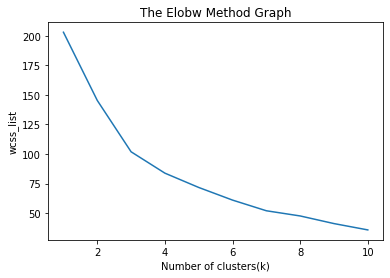

In [6]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [7]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

'''
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.xlabel('Commission Errors')  
mtp.ylabel('Omission Errors')  
mtp.legend()  
mtp.show()  
'''

[1 1 1 1 1 1 1 1 1 2 0 2 0 0 2 2 1 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0
 0 0]


"\n#visulaizing the clusters  \nmtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  \nmtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  \nmtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    \nmtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   \nmtp.title('Clusters of children')  \nmtp.xlabel('Commission Errors')  \nmtp.ylabel('Omission Errors')  \nmtp.legend()  \nmtp.show()  \n"

In [15]:
new_df = dataset.iloc[:, [2, 7, 8, 10, 11]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,mean_reaction_time,total_duration,percentage_no_of_correct_responses,oer,clusters
324,4,1500,132928,80.000000,20.000000,1
325,4,1472,133598,90.000000,10.000000,1
326,4,1523,203243,90.322581,9.677419,1
327,4,1267,86043,92.307692,7.692308,1
328,4,1501,46708,100.000000,0.000000,1
329,4,1369,114319,88.235294,11.764706,1
330,4,998,95887,86.666667,13.333333,1
331,4,1655,25196,75.000000,25.000000,1
332,5,1296,220070,97.058824,2.941176,1
333,5,1173,44919,71.428571,28.571429,2


# Cluster Analysis

## Cluster 1

In [16]:
len(new_df[new_df["clusters"] == 0])

22

In [17]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)
# cluster_0.boxplot(column =['CER'], grid = False)
# cluster_0.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,total_duration,percentage_no_of_correct_responses,oer,clusters
334,5,851,86529,92.857143,7.142857,0
336,5,1056,106353,88.235294,11.764706,0
337,5,1079,85407,84.615385,15.384615,0
342,6,824,56454,77.777778,22.222222,0
343,6,971,53730,88.888889,11.111111,0
344,6,785,93980,92.857143,7.142857,0
345,6,1324,107652,100.000000,0.000000,0
346,6,1024,71768,90.909091,9.090909,0
347,6,1056,2558,100.000000,0.000000,0
348,6,1025,9306,100.000000,0.000000,0


In [18]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['mean_reaction_time'].max()
minVal = cluster_0['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_0['total_duration'].max()
minVal = cluster_0['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_0['percentage_no_of_correct_responses'].max()
minVal = cluster_0['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

mean_reaction_time min -  719
mean_reaction_time max -  1324

total_duration min -  2125
total_duration max -  179629

percentage_no_of_correct_responses min -  77.77777778
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  22.22222222


## Cluster 2

In [19]:
len(new_df[new_df["clusters"] == 1])

10

In [20]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
#cluster_1.boxplot(column =['CER'], grid = False)
#cluster_1.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,total_duration,percentage_no_of_correct_responses,oer,clusters
324,4,1500,132928,80.000000,20.000000,1
325,4,1472,133598,90.000000,10.000000,1
326,4,1523,203243,90.322581,9.677419,1
327,4,1267,86043,92.307692,7.692308,1
328,4,1501,46708,100.000000,0.000000,1
329,4,1369,114319,88.235294,11.764706,1
330,4,998,95887,86.666667,13.333333,1
331,4,1655,25196,75.000000,25.000000,1
332,5,1296,220070,97.058824,2.941176,1
340,5,1254,65582,100.000000,0.000000,1


In [21]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['mean_reaction_time'].max()
minVal = cluster_1['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_1['total_duration'].max()
minVal = cluster_1['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

mean_reaction_time min -  998
mean_reaction_time max -  1655

total_duration min -  25196
total_duration max -  220070

percentage_no_of_correct_responses min -  75.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  25.0


## Cluster 3

In [22]:
len(new_df[new_df["clusters"] == 2])

7

In [23]:
cluster_2 = new_df[new_df["clusters"] == 2 ]
display(cluster_2)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,total_duration,percentage_no_of_correct_responses,oer,clusters
333,5,1173,44919,71.428571,28.571429,2
335,5,1029,33134,80.000000,20.000000,2
338,5,1059,8137,100.000000,100.000000,2
339,5,1155,10332,50.000000,50.000000,2
341,6,757,16803,66.666667,33.333333,2
349,6,1077,9653,50.000000,50.000000,2
352,7,1037,35262,66.666667,33.333333,2


In [24]:
cluster_2 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_2['mean_reaction_time'].max()
minVal = cluster_2['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_2['total_duration'].max()
minVal = cluster_2['total_duration'].min()

print("total_duration min - ", minVal)
print("total_duration max - ", maxVal)
print()

maxVal = cluster_2['percentage_no_of_correct_responses'].max()
minVal = cluster_2['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_2['oer'].max()
minVal = cluster_2['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

mean_reaction_time min -  757
mean_reaction_time max -  1173

total_duration min -  8137
total_duration max -  44919

percentage_no_of_correct_responses min -  50.0
percentage_no_of_correct_responses max -  100.0

oer min -  20.0
oer max -  100.0


In [ ]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['CER'], "Cluster2": cluster_1['CER'], "Cluster3": cluster_2['CER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [ ]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['OER'], "Cluster2": cluster_1['OER'], "Cluster3": cluster_2['OER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()